# Bajando Precios de Yahoo Finance

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [5]:
df = yf.download('BYMA.BA', start ='2022-01-01', end ='2022-04-14', progress = False)
df = df.loc[:, ['Adj Close']]
df.rename(columns = {'Adj Close':'adj_close'}, inplace = True)

Bajamos los datos de BYMA `'BYMA.BA` utilizando la librería `yfinance`.
Solamente nos quedamos con el precio ajustado (por pago de dividendos).

Para calcular el retorno simple utiliamos el método `pct_change` de la librería `pandas` Series / DataFrame.


In [7]:
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn']    = np.log(df.adj_close / df.adj_close.shift(1))  # shift(1) porque nos interesa retorno simple.

In [8]:
print(df['adj_close'])

Date
2022-01-03    1066.0
2022-01-04    1061.5
2022-01-05    1080.5
2022-01-06    1069.0
2022-01-07    1067.5
               ...  
2022-04-07    1266.5
2022-04-08    1240.5
2022-04-11    1229.5
2022-04-12    1231.5
2022-04-13    1226.5
Name: adj_close, Length: 70, dtype: float64


Finalmente utiliando la librería `matplotlib` hacemos una grafica simple de la evolución del precio de BYMA entre las fechas `start` & `end`

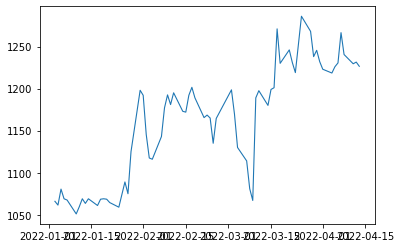

In [9]:
fig, ax = plt.subplots()
ax.plot(df['adj_close'], linewidth=1.1)
plt.show()